In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance

In [22]:
df = pd.read_csv("downloads/GBP_USD_M15.csv", sep=",")

In [23]:
import talib as ta
def addIndicators(df):

    df['RSI5'] = ta.RSI(df['close'], timeperiod=5)
    df['RSI10'] = ta.RSI(df['close'], timeperiod=10)
    df['RSI20'] = ta.RSI(df['close'], timeperiod=20)

    df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['close'], \
                                                                 fastperiod=12, slowperiod=26, signalperiod=9)

    df['slowk'], df['slowd'] = ta.STOCH(df['high'], df['low'], \
                                            df['close'], fastk_period=5, slowk_period=3, slowk_matype=0,
                                            slowd_period=3, slowd_matype=0)
    df['fastk'], df['fastd'] = ta.STOCHF(df['high'], df['low'], \
                                             df['close'], fastk_period=5, fastd_period=3, fastd_matype=0)

    df['WR5'] = ta.WILLR(df['high'], df['low'], df['close'], timeperiod=5)
    df['WR10'] = ta.WILLR(df['high'], df['low'], df['close'], timeperiod=10)
    df['WR20'] = ta.WILLR(df['high'], df['low'], df['close'], timeperiod=20)

    df['ROC5'] = ta.ROC(df['close'], timeperiod=5)
    df['ROC10'] = ta.ROC(df['close'], timeperiod=10)
    df['ROC20'] = ta.ROC(df['close'], timeperiod=20)


    df['CCI5'] = ta.CCI(df['high'], df['low'], df['close'], timeperiod=5)
    df['CCI10'] = ta.CCI(df['high'], df['low'], df['close'], timeperiod=10)
    df['CCI20'] = ta.CCI(df['high'], df['low'], df['close'], timeperiod=20)

    df['ATR5'] = ta.ATR(df['high'], df['low'], df['close'], timeperiod=5)
    df['ATR10'] = ta.ATR(df['high'], df['low'], df['close'], timeperiod=10)
    df['ATR20'] = ta.ATR(df['high'], df['low'], df['close'], timeperiod=20)

    df['NATR5'] = ta.NATR(df['high'], df['low'], df['close'], timeperiod=5)
    df['NATR10'] = ta.NATR(df['high'], df['low'], df['close'], timeperiod=10)
    df['NATR20'] = ta.NATR(df['high'], df['low'], df['close'], timeperiod=20)

    df['TRANGE'] = ta.TRANGE(df['high'], df['low'], df['close'])
    return df
df = addIndicators(df)

C:\Users\Rakshith\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


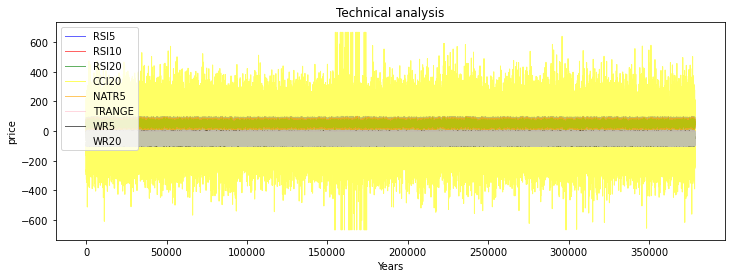

In [28]:
plt.figure(figsize = (12,4))
plt.plot(df['RSI5'],label='RSI5', lw = 1, alpha = 100, color = 'blue')
plt.plot(df['RSI10'],label='RSI10', lw = 1, alpha = 100, color = 'red')
plt.plot(df['RSI20'],label='RSI20', lw = 1, alpha = 100,color = 'green')
plt.plot(df['CCI20'],label='CCI20', lw = 1, alpha = 100,color = 'yellow')
plt.plot(df['NATR5'],label='NATR5', lw = 1, alpha = 100,color = 'orange')
plt.plot(df['TRANGE'],label='TRANGE', lw = 1, alpha = 100, color = 'pink')
plt.plot(df['WR5'],label='WR5', lw = 1, alpha = 100, color = 'black')
plt.plot(df['WR20'],label='WR20', lw = 1, alpha = 100,color = 'white')
plt.title('Technical analysis')
plt.ylabel('price')
plt.xlabel('Years')
plt.legend()
plt.show()

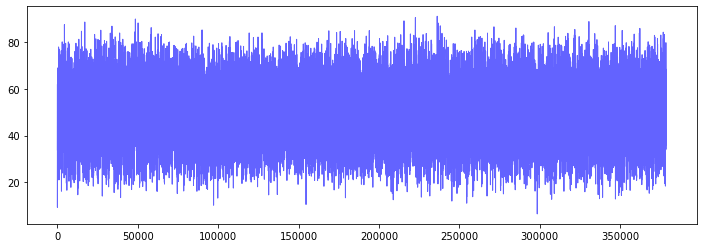

In [31]:
plt.figure(figsize = (12,4))
plt.plot(df['RSI20'],label='RSI5', lw = 1, alpha = 100, color = 'blue')
plt.show()

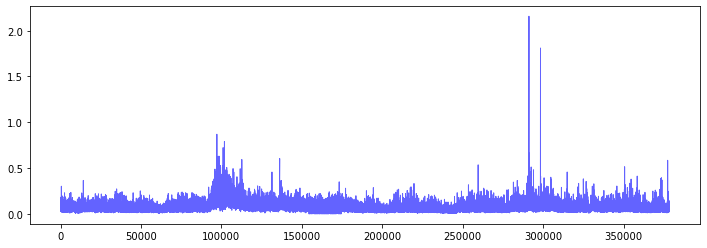

In [32]:
plt.figure(figsize = (12,4))
plt.plot(df['NATR5'],label='RSI5', lw = 1, alpha = 100, color = 'blue')
plt.show()

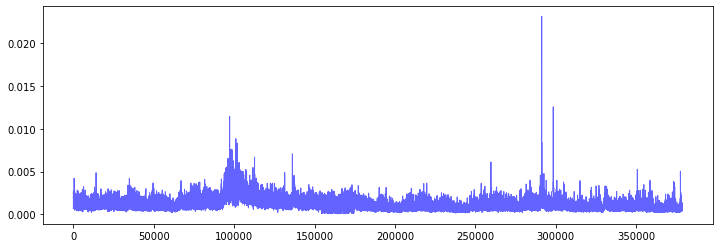

In [33]:
plt.figure(figsize = (12,4))
plt.plot(df['ATR10'],label='RSI5', lw = 1, alpha = 100, color = 'blue')
plt.show()

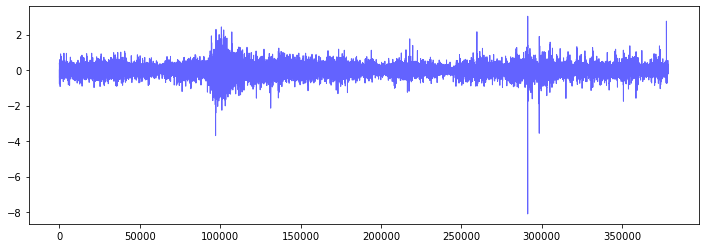

In [34]:
plt.figure(figsize = (12,4))
plt.plot(df['ROC10'],label='RSI5', lw = 1, alpha = 100, color = 'blue')
plt.show()

In [5]:
df['diff1'] = -1 * df['close'].diff(periods = -1)/df['close']
df['diff2'] = -1 * df['close'].diff(periods = -2)/df['close']
df['diff3'] = -1 * df['close'].diff(periods = -3)/df['close']
df['diff4'] = -1 * df['close'].diff(periods = -4)/df['close']
df['diff5'] = -1 * df['close'].diff(periods = -5)/df['close']

In [6]:
df['label'] = ''
for i in range(0, len(df)-4): 
   if df['diff1'][i] >= 0.005 or df['diff2'][i] >= 0.005 or df['diff3'][i] >= 0.005 or df['diff4'][i] >= 0.005 or df['diff5'][i] >= 0.005:
    df['label'][i] = 1 # Buy label
   elif df['diff1'][i] < -0.005 or df['diff2'][i] < -0.005 or df['diff3'][i] < -0.005 or df['diff4'][i] < -0.005 or df['diff5'][i] < -0.005:
    df['label'][i] = -1 # Buy sell
   else:
    df['label'][i] = 0  # Hold do nothing

<ipython-input-6-92335ad600cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 0  # Hold do nothing
<ipython-input-6-92335ad600cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1 # Buy sell
<ipython-input-6-92335ad600cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1 # Buy label


In [7]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,RSI5,RSI10,RSI20,...,NATR5,NATR10,NATR20,TRANGE,diff1,diff2,diff3,diff4,diff5,label
0,0,2005-01-02T19:15:00.000000000Z,1.91930,1.91930,1.91930,1.91930,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000052,0.000208,0.000208,0.000052,0.000261,0
1,1,2005-01-02T19:30:00.000000000Z,1.91880,1.91970,1.91880,1.91940,11,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00090,0.000156,0.000156,-0.000000,0.000208,0.000104,0
2,2,2005-01-02T20:00:00.000000000Z,1.91910,1.91970,1.91910,1.91970,2,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00060,-0.000000,-0.000156,0.000052,-0.000052,-0.000365,0
3,3,2005-01-02T20:30:00.000000000Z,1.91930,1.91970,1.91930,1.91970,2,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00040,-0.000156,0.000052,-0.000052,-0.000365,-0.000156,0
4,4,2005-01-02T20:45:00.000000000Z,1.91970,1.91970,1.91850,1.91940,36,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00120,0.000208,0.000104,-0.000208,-0.000000,-0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378503,481,2019-12-30T22:30:00.000000000Z,1.31173,1.31195,1.31162,1.31191,44,73.310109,55.577248,50.664001,...,0.041312,0.051315,0.063112,0.00033,0.000137,-0.000175,-0.000053,-0.000579,NaN,0
378504,482,2019-12-30T22:45:00.000000000Z,1.31196,1.31220,1.31175,1.31209,46,76.812405,57.783650,51.655556,...,0.039904,0.049606,0.061663,0.00045,-0.000312,-0.000191,-0.000716,NaN,NaN,
378505,483,2019-12-30T23:00:00.000000000Z,1.31204,1.31204,1.31168,1.31168,36,55.919788,51.331136,49.280802,...,0.038185,0.047786,0.060161,0.00041,0.000122,-0.000404,NaN,NaN,NaN,
378506,484,2019-12-30T23:15:00.000000000Z,1.31164,1.31186,1.31148,1.31184,29,61.083283,53.578813,50.220875,...,0.036338,0.045898,0.058595,0.00038,-0.000526,NaN,NaN,NaN,NaN,


In [8]:
df = df.drop(columns=['diff1', 'diff2', 'diff3', 'diff4', 'diff5'])
df = df. dropna() 

In [9]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,RSI5,RSI10,RSI20,...,CCI10,CCI20,ATR5,ATR10,ATR20,NATR5,NATR10,NATR20,TRANGE,label
33,33,2005-01-03T04:00:00.000000000Z,1.90180,1.90500,1.90120,1.90400,213,27.293027,21.476273,21.257346,...,-87.485857,-150.657468,0.003464,0.002676,0.001975,0.181943,0.140537,0.103711,0.00380,0
34,34,2005-01-03T04:15:00.000000000Z,1.90420,1.90460,1.90330,1.90400,139,27.293027,21.476273,21.257346,...,-64.350243,-119.878702,0.003031,0.002538,0.001941,0.159210,0.133311,0.101939,0.00130,0
35,35,2005-01-03T04:30:00.000000000Z,1.90400,1.90500,1.90400,1.90440,98,31.545928,24.023669,22.985690,...,-46.987456,-98.408915,0.002625,0.002384,0.001894,0.137843,0.125206,0.099447,0.00100,0
36,36,2005-01-03T04:45:00.000000000Z,1.90450,1.90490,1.90440,1.90470,42,35.104650,26.023566,24.297492,...,-35.019455,-83.971264,0.002200,0.002196,0.001824,0.115507,0.115292,0.095772,0.00050,0
37,37,2005-01-03T05:00:00.000000000Z,1.90460,1.90580,1.90460,1.90580,99,47.592082,33.188460,28.967338,...,-4.816956,-67.003392,0.002000,0.002096,0.001793,0.104946,0.110000,0.094080,0.00120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378503,481,2019-12-30T22:30:00.000000000Z,1.31173,1.31195,1.31162,1.31191,44,73.310109,55.577248,50.664001,...,143.347639,42.100393,0.000542,0.000673,0.000828,0.041312,0.051315,0.063112,0.00033,0
378504,482,2019-12-30T22:45:00.000000000Z,1.31196,1.31220,1.31175,1.31209,46,76.812405,57.783650,51.655556,...,121.730015,61.673685,0.000524,0.000651,0.000809,0.039904,0.049606,0.061663,0.00045,
378505,483,2019-12-30T23:00:00.000000000Z,1.31204,1.31204,1.31168,1.31168,36,55.919788,51.331136,49.280802,...,73.554422,37.494985,0.000501,0.000627,0.000789,0.038185,0.047786,0.060161,0.00041,
378506,484,2019-12-30T23:15:00.000000000Z,1.31164,1.31186,1.31148,1.31184,29,61.083283,53.578813,50.220875,...,52.972473,35.571520,0.000477,0.000602,0.000769,0.036338,0.045898,0.058595,0.00038,


In [10]:
df['coff1'] = -1 * df['low'].diff(periods = -1)/df['low']
df['coff2'] = -1 * df['low'].diff(periods = -2)/df['low']
df['coff3'] = -1 * df['low'].diff(periods = -3)/df['low']
df['coff4'] = -1 * df['low'].diff(periods = -4)/df['low']
df['coff5'] = -1 * df['low'].diff(periods = -5)/df['low']

,Unnamed: 0,datetime,open,high,low,close,volume,RSI5,RSI10,RSI20,...,NATR10,NATR20,TRANGE,label,coff1,coff2,coff3,coff4,coff5,low_label
33,33,2005-01-03T04:00:00.000000000Z,1.90180,1.90500,1.90120,1.90400,213,27.293027,21.476273,21.257346,...,0.140537,0.103711,0.00380,0,0.001105,0.001473,0.001683,0.001788,0.001420,
34,34,2005-01-03T04:15:00.000000000Z,1.90420,1.90460,1.90330,1.90400,139,27.293027,21.476273,21.257346,...,0.133311,0.101939,0.00130,0,0.000368,0.000578,0.000683,0.000315,0.000263,
35,35,2005-01-03T04:30:00.000000000Z,1.90400,1.90500,1.90400,1.90440,98,31.545928,24.023669,22.985690,...,0.125206,0.099447,0.00100,0,0.000210,0.000315,-0.000053,-0.000105,0.000368,
36,36,2005-01-03T04:45:00.000000000Z,1.90450,1.90490,1.90440,1.90470,42,35.104650,26.023566,24.297492,...,0.115292,0.095772,0.00050,0,0.000105,-0.000263,-0.000315,0.000158,0.000368,
37,37,2005-01-03T05:00:00.000000000Z,1.90460,1.90580,1.90460,1.90580,99,47.592082,33.188460,28.967338,...,0.110000,0.094080,0.00120,0,-0.000368,-0.000420,0.000053,0.000263,0.000210,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378503,481,2019-12-30T22:30:00.000000000Z,1.31173,1.31195,1.31162,1.31191,44,73.310109,55.577248,50.664001,...,0.051315,0.063112,0.00033,0,0.000099,0.000046,-0.000107,-0.000473,NaN,
378504,482,2019-12-30T22:45:00.000000000Z,1.31196,1.31220,1.31175,1.31209,46,76.812405,57.783650,51.655556,...,0.049606,0.061663,0.00045,,-0.000053,-0.000206,-0.000572,NaN,NaN,
378505,483,2019-12-30T23:00:00.000000000Z,1.31204,1.31204,1.31168,1.31168,36,55.919788,51.331136,49.280802,...,0.047786,0.060161,0.00041,,-0.000152,-0.000518,NaN,NaN,NaN,
378506,484,2019-12-30T23:15:00.000000000Z,1.31164,1.31186,1.31148,1.31184,29,61.083283,53.578813,50.220875,...,0.045898,0.058595,0.00038,,-0.000366,NaN,NaN,NaN,NaN,


In [115]:
for i in range(1, len(df)-5): 
    if df['coff1'][i] >= 0.001 or df['coff2'][i] >= 0.001 or df['coff3'][i] >= 0.001 or df['coff4'][i] >= 0.001 or df['coff5'][i] >= 0.001:
        df['low_label'][i] = 1
    elif df['coff1'][i] < -0.001 or df['coff2'][i] < -0.001 or df['coff3'][i] < -0.001 or df['coff4'][i] < -0.001 or df['coff5'][i] < -0.001:
        df['low_label'][i] = -1
    else:
        df['low_label'][i] = 0

<ipython-input-115-108229c9a7b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low_label'][i] = 0
<ipython-input-115-108229c9a7b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low_label'][i] = 1
<ipython-input-115-108229c9a7b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low_label'][i] = -1


# Decision Tree Machine Learning 

In [36]:
df.to_csv('downloads/GBP10.csv')

In [42]:
from sklearn.tree import DecisionTreeClassifier
import datetime
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

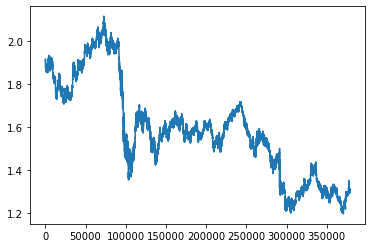

In [43]:
plt.plot(df['close'])

In [71]:
df['Return'] = df['close'].pct_change(100000).shift(-100000)
list_of_features = ['high','low','close','volume','open']
x = df[list_of_features]
y = np.where(df.Return > 0, 1, 0)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [73]:
treeClassifier = DecisionTreeClassifier(max_depth = 3 , min_samples_leaf = 6)
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [74]:
y_pred = treeClassifier.predict(x_test)

In [75]:
from sklearn.metrics import classification_report 
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    101708
           1       0.00      0.00      0.00     11835

    accuracy                           0.90    113543
   macro avg       0.45      0.50      0.47    113543
weighted avg       0.80      0.90      0.85    113543



C:\Users\Rakshith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakshith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakshith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,RSI5,RSI10,RSI20,...,label,coff1,coff2,coff3,coff4,coff5,low_label,return,Return,5_Day_Price_Forecast
2005-01-03 04:00:00+00:00,33,2005-01-03T04:00:00.000000000Z,1.90180,1.90500,1.90120,1.90400,213,27.293027,21.476273,21.257346,...,0,0.001105,0.001473,0.001683,0.001788,0.001420,,-0.000919,-0.223477,1.9041
2005-01-03 04:15:00+00:00,34,2005-01-03T04:15:00.000000000Z,1.90420,1.90460,1.90330,1.90400,139,27.293027,21.476273,21.257346,...,0,0.000368,0.000578,0.000683,0.000315,0.000263,0,-0.000394,-0.223256,1.9051
2005-01-03 04:30:00+00:00,35,2005-01-03T04:30:00.000000000Z,1.90400,1.90500,1.90400,1.90440,98,31.545928,24.023669,22.985690,...,0,0.000210,0.000315,-0.000053,-0.000105,0.000368,0,0.000079,-0.223461,1.9055
2005-01-03 04:45:00+00:00,36,2005-01-03T04:45:00.000000000Z,1.90450,1.90490,1.90440,1.90470,42,35.104650,26.023566,24.297492,...,0,0.000105,-0.000263,-0.000315,0.000158,0.000368,0,-0.000184,-0.223111,1.9052
2005-01-03 05:00:00+00:00,37,2005-01-03T05:00:00.000000000Z,1.90460,1.90580,1.90460,1.90580,99,47.592082,33.188460,28.967338,...,0,-0.000368,-0.000420,0.000053,0.000263,0.000210,0,-0.000866,-0.225438,1.9051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 22:30:00+00:00,481,2019-12-30T22:30:00.000000000Z,1.31173,1.31195,1.31162,1.31191,44,73.310109,55.577248,50.664001,...,0,0.000099,0.000046,-0.000107,-0.000473,NaN,,NaN,NaN,NaN
2019-12-30 22:45:00+00:00,482,2019-12-30T22:45:00.000000000Z,1.31196,1.31220,1.31175,1.31209,46,76.812405,57.783650,51.655556,...,,-0.000053,-0.000206,-0.000572,NaN,NaN,,NaN,NaN,NaN
2019-12-30 23:00:00+00:00,483,2019-12-30T23:00:00.000000000Z,1.31204,1.31204,1.31168,1.31168,36,55.919788,51.331136,49.280802,...,,-0.000152,-0.000518,NaN,NaN,NaN,,NaN,NaN,NaN
2019-12-30 23:15:00+00:00,484,2019-12-30T23:15:00.000000000Z,1.31164,1.31186,1.31148,1.31184,29,61.083283,53.578813,50.220875,...,,-0.000366,NaN,NaN,NaN,NaN,,NaN,NaN,NaN


# SVR Machine Leanring 

In [77]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [79]:
df = df.set_index(pd.DatetimeIndex(df['datetime'].values)) #setting date as index 

In [86]:
future_days = 5

In [87]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['close']].shift(-future_days)

In [88]:
df[['close',str(future_days) + '_Day_Price_Forecast']]

,close,5_Day_Price_Forecast
2005-01-03 04:00:00+00:00,1.90400,1.9041
2005-01-03 04:15:00+00:00,1.90400,1.9051
2005-01-03 04:30:00+00:00,1.90440,1.9055
2005-01-03 04:45:00+00:00,1.90470,1.9052
2005-01-03 05:00:00+00:00,1.90580,1.9051
...,...,...
2019-12-30 22:30:00+00:00,1.31191,NaN
2019-12-30 22:45:00+00:00,1.31209,NaN
2019-12-30 23:00:00+00:00,1.31168,NaN
2019-12-30 23:15:00+00:00,1.31184,NaN


In [89]:
x = np.array(df[['close']])
x = x[:df.shape[0] - future_days]
print(x)

[[1.904  ]
 [1.904  ]
 [1.9044 ]
 ...
 [1.31099]
 [1.31134]
 [1.31178]]


In [90]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[1.9041  1.9051  1.9055  ... 1.31168 1.31184 1.31115]


In [91]:
#splitting the data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [93]:
from sklearn.svm import SVR 
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.001)

In [95]:
svr_rbf_confidence = svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 0.9731745812746413


In [96]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[1.76807164 1.96590445 1.2744925  ... 1.52875335 1.65151825 1.49091245]


In [97]:
print(y_test)

[1.8169  2.04965 1.23828 ... 1.53382 1.67774 1.49082]


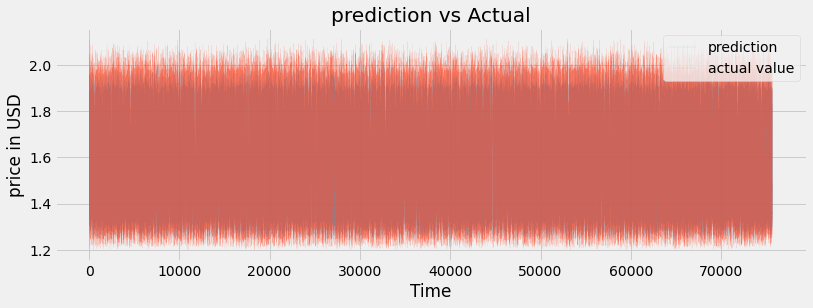

In [114]:
plt.figure(figsize = (12,4))
plt.plot(svm_prediction,label='prediction', lw = 0.09, alpha = 1000000)
plt.plot(y_test,label='actual value', lw = 0.09, alpha = 1000000)
plt.title('prediction vs Actual')
plt.ylabel('price')
plt.xlabel('Time')
plt.legend()
plt.show()

# LSTM Machine Learning Algorithm 

In [ ]:
#preprocess data train and test , create stacked LSTM model, predict test data and plot op 
#predict future 30 days and plot the op
#minmax scalar is used here, lstm are sensitiveto scale of the data 

In [36]:
import pandas as pd 
import numpy as np

In [37]:
df = pd.read_csv("downloads/GBP_USD_M15.csv", sep=",")
df2 = df['close']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [39]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [40]:
import numpy 
#array into dataset matrix 
def create_dataset(dataset,time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
#reshaping the time series with respect to x and y 
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [42]:
#reshape input to be in samples [samples, time steps, features] according to the LSTM 
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model = Sequential()
model.add(LSTM(50,return_sequences =True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_square_error',optimizer = 'adam')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
import keras 
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=64,verbose=1)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\losses.py", line 2369, in get
        return deserialize(identifier)
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\losses.py", line 2324, in deserialize
        return deserialize_keras_object(
    File "C:\Users\Rakshith\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: mean_square_error. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [47]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
train_predict = sclaler.inverse_transform(train_predict)
test_predict = sclaler.inverse_transform(test_predict)

In [ ]:
import math 
from sklearn.metrics import mean_square_error
math.sqrt(mean_square_error(y_train,train_predict))

In [ ]:
#test data RMSE
math.sqrt(mean_sqaure_error(ytest,test_predict))

In [ ]:
#plotting
look_back = 5
trainpredictplot = numpy.empty_like(df2)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test prediction for plottting 
testpredictplot = numpy.empty_like(df2)
testpredictplot[:,:] = numpy.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
plt.plot(scalar.inverse_transform(df2))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [ ]:
x_input = test_data[37850:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array 
lst_output = []
n_steps = 100
i = 0
while(i<5):#next 5 days 
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhh = model.predict(x_input,verbose = 0)
        print("{day output {}".format(i,yhh))
        temp_input.extend(yhh[0].tolist())
        temp_input = temp_input[1:]
        1st_output.extend(yhh.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1)
        yhh = model.predict(x_input,verbose = 0)
        print(yhh[0])
        temp_input.extend(yhh[0].tolist())
        print(len(temp_input))
        1st_output.extend(yhh.tolist())
        i = i+1    